# Autograd Package
This package helps us with calculating the gradients in PyTorch.

In [ ]:
import torch

In [ ]:
x = torch.tensor(3., requires_grad=True)  # In randn, the random values are taken from a normal distribution. It's not bounded in [0,1) range
print(x)

tensor(3., requires_grad=True)


In [ ]:
y = x + 2
print(y)

tensor(5., grad_fn=<AddBackward0>)


We notice how here the tensor now has a grad_fn. This grad_fn is the backpropagation function for the forward propagation function y.

In [ ]:
z = y*y*2
print(z)

tensor(50., grad_fn=<MulBackward0>)


The backward() function is used to calculate the gradient during backward pass in the neural network. The gradients can then be accessed by the .grad parameter.
Here, by gradient, we mean that it calculates the derivative of the function with respect to the input (referred to as leaf nodes in documentation)

In [ ]:
z.backward() # This calculates the derivative of z with all the inputs that it's been given. In our case, we only have x as the input.
print(x.grad) # This prints the gradient with respect to x. (The derivative of z with respect to x)
# Manually finding the gradient, we would get, dz/dx = dz/dy * dy/dx = 4*y * 1 = 4*y
# Since the value of y is 5, output should be 20 which is true.

tensor(20.)


To understand this better, watch this video - It explains what a Jacobian Matrix is and how it's being used in the backward function of PyTorch
- https://www.youtube.com/watch?v=igypbt686zI
- https://www.youtube.com/watch?v=hjnVLfvhN0Q

In short, Jacobian Matrix is a matrix that contains partial derivative of y with each input element. Then we expand that column wise for each element of y in the same matrix, so it becomes the jacobian matrix. In pytorch, the backward function finds out the dot product of a vector v that we pass into the function as a parameter and the transpose of the jacobian matrix.

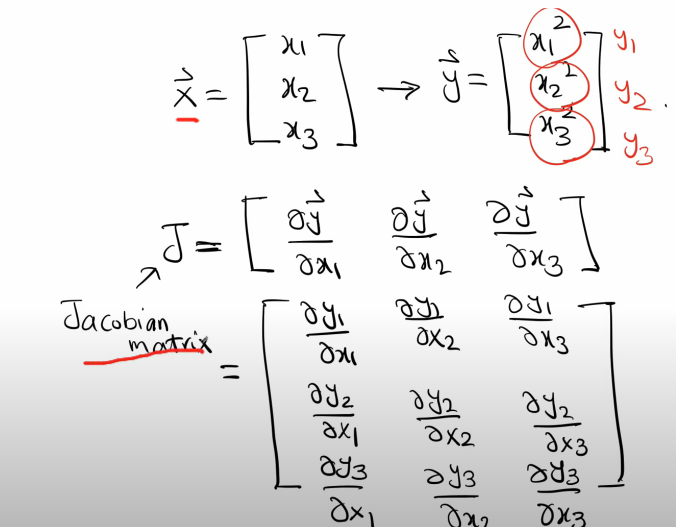

In [ ]:
# For non-scalar leaf nodes, 
x = torch.randn(3, requires_grad=True)
v = torch.tensor([1., 1., 1.])
z = x**3 + x**2
z.backward(v)
grad = 3*x**2 + 2*x
print('Manually Calculated Gradient Vector: ', grad)
print(x, x.grad)  # Gradient calculated by PyTorch

Manually Calculated Gradient Vector:  tensor([2.7459, 0.4112, 5.5698], grad_fn=<AddBackward0>)
tensor([0.6798, 0.1648, 1.0694], requires_grad=True) tensor([2.7459, 0.4112, 5.5698])


Now, if you want to prevent PyTorch from tracking the gradients and calculating the grad_fn attribute, there are 3 different ways -
- x.requires_grad(False)
- x.detach() Creates a new tensor that doesn't require the gradient.
- with torch.no_grad():

This will be explained in detail in a later tutorial notebook

In [ ]:
t = x.detach()
print(t)  # y has the same values but doesn't require gradients.

tensor([0.6798, 0.1648, 1.0694])


In [ ]:
with torch.no_grad():
  y = x + 2
  print(y)  # Here also, we see that y doesn't have the grad_fn attribute, meaning the gradients are not being tracked for this.

tensor([2.6798, 2.1648, 3.0694])


Training Example -

An important thing to note is that the backward function accumulates the gradients in the grad attribute. So, each time the loop is run, the new gradients are just being added to the grad attribute. This results in us getting the wrong values for gradients. You can look at it in the example below.

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


To fix this, we must set our gradients to zero after they're used. This is done using weights.grad.zero_() function

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()  # This sets the gradients to zero so that new ones can be calculated.

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


##Backpropagation

The PyTorch framework creates a computational graph in the background and everytime we perform an operation, it calculates the local gradients at those nodes. These local gradients are then used to figure out the final gradients during backward propagation.

For example, let's perform the multiplication operation on two tensors x, y which results in some tensor z. Then, the graph created is -
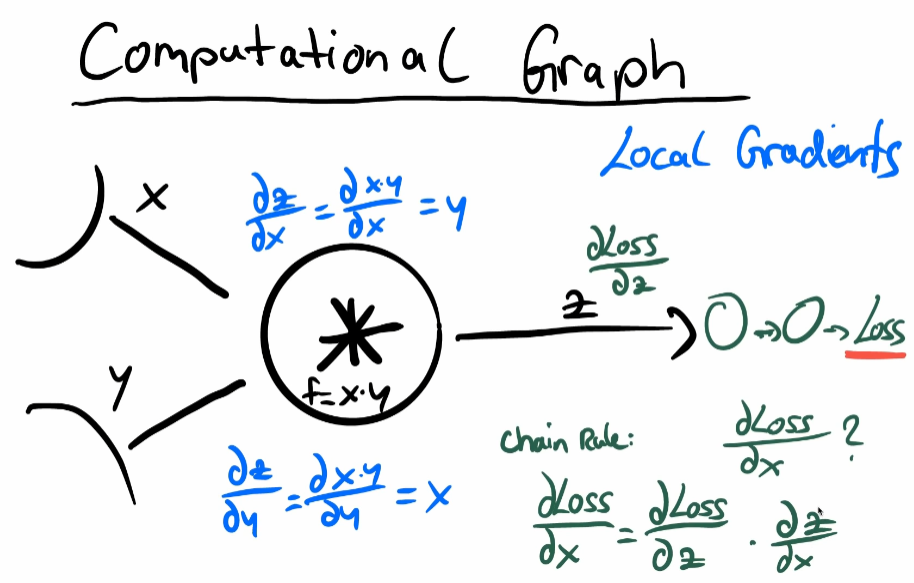

The process of backpropagation can be divided into three steps:
- Forward pass: Calculate the loss
- Compute the local gradients
- Backward pass: Compute the dLoss/dWeights using chain rule.

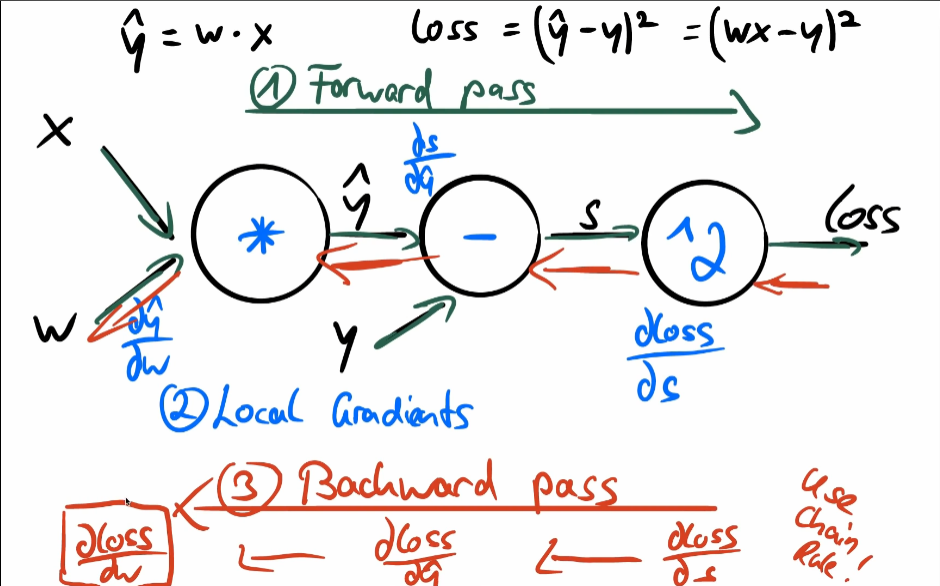

In [ ]:
x = torch.tensor(1.)
y = torch.tensor(2.)

w = torch.tensor(1., requires_grad=True)

# Forward pass and compute local gradients.
y_hat = w * x
loss = (y - y_hat)**2

print(loss)

# Backward pass
loss.backward()
print(w.grad)

# update weights and then repeat.

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)
